Skipping file CORR-R0509-DA04-S00005.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0509/CORR-R0509-DA04-S00005.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0509-DA04-S00001.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0509/CORR-R0509-DA04-S00001.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0509-DA02-S00005.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0509/CORR-R0509-DA02-S00005.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))


./data/0509-ePix1_mean.tif
HED_IA1_EPX100-1/DET/RECEIVER:daqOutput
-1
2781 images in run
(708, 768)
<class 'numpy.ndarray'>
(708, 768)
<class 'PIL.Image.Image'>


Skipping file CORR-R0510-DA08-S00002.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0510/CORR-R0510-DA08-S00002.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0510-DIGI01-S00005.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0510/CORR-R0510-DIGI01-S00005.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0510-DA01-S00004.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0510/CORR-R0510-DA01-S00004.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0510-DA08-S00004.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0510/CORR-R0510-DA08-S00004.h5', errno = 13, error 

./data/0510-ePix1_mean.tif
HED_IA1_EPX100-1/DET/RECEIVER:daqOutput
-1
2706 images in run
(708, 768)
<class 'numpy.ndarray'>
(708, 768)
<class 'PIL.Image.Image'>


Skipping file CORR-R0511-DA04-S00003.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0511/CORR-R0511-DA04-S00003.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0511-DA01-S00001.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0511/CORR-R0511-DA01-S00001.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0511-DA02-S00002.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0511/CORR-R0511-DA02-S00002.h5', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0))
Skipping file CORR-R0511-DA02-S00000.h5
  (error was: [Errno 13] Unable to open file (unable to open file: name = '/gpfs/exfel/exp/HED/202201/p002806/proc/r0511/CORR-R0511-DA02-S00000.h5', errno = 13, error mess

./data/0511-ePix1_mean.tif
HED_IA1_EPX100-1/DET/RECEIVER:daqOutput
-1
2669 images in run
(708, 768)
<class 'numpy.ndarray'>
(708, 768)
<class 'PIL.Image.Image'>


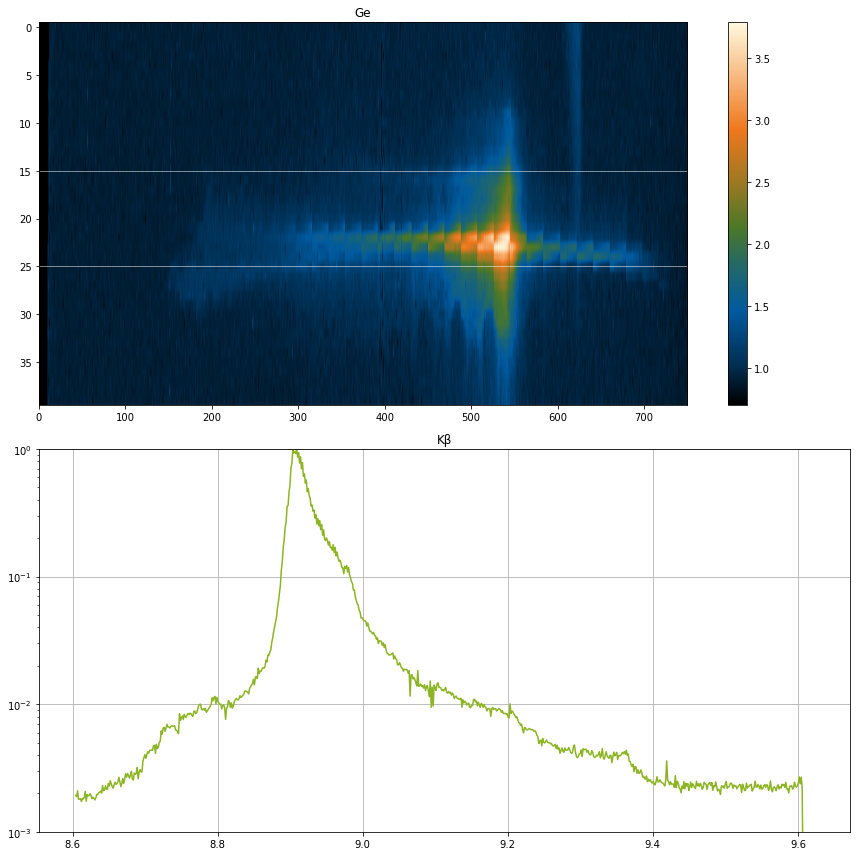

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os
import numpy as np
import scipy
from scipy import optimize, ndimage
import matplotlib.pyplot as plt
import sys
import mmmUtils as mu
from PIL import Image
from importlib import reload
import extra_mmm as em
import extra_data
import rossendorfer_farbenliste as rofl

reload(em)
reload(mu)
proposal=2806  #Proposal number
runNos=np.arange(370,394)
dark = Image.open('data/ePixDark.tif')
dark = np.array(dark)
em.ePix_dark=dark

runNos=np.array([415])
runNos=np.arange(509,512)

for runNo in runNos:
    trainId=-1

    outDir='./Ge_overviews/'  #Directory to store output images
    lineoutDir='./lineouts/'

    # %%
    mu.figure(12,12)
    r=2
    c=1
    axGeImage = plt.subplot2grid((r, c), (0, 0), colspan=1, rowspan=1)
    axSpectrumKb = plt.subplot2grid((r, c), (1, 0), colspan=1, rowspan=1)
    col_Ge=rofl.g()
    col_HapgA=rofl.b()
    col_HapgB=rofl.o()
    debug=0
    recalc=0
    run = extra_data.open_run(proposal, runNo, data='all')  #Opening the given run
    jf1=[]
    jf2=[]
    epix=em.get_image(run,runNo,'ePix1',trainId,debug=1,recalc=recalc,threshold_lower=40)


    # %% Ge spectrometer
    if np.size(epix)>0: # do the HAPG Kα spectrometer
        epixo=epix
            #parameters
        centralY=305
        centralY=301
        imHeight=20
        cut_left=0
        cut_right=1500
        spectraHeight=5 
        Ge_x0=540
        Ge_E0=8905
        disp=26.5 #eV/mm
        Ge_dispersion=-disp*0.05 #eV/px
        rotation_angle=-3
            #processing
    #    epix=np.transpose(epix)
        im = Image.fromarray(epix)
        im = im.rotate(rotation_angle, center=[centralY,512])
        epix= np.array(im)
        epix=epix[centralY-imHeight:centralY+imHeight,cut_left:cut_right]
        epixcut=epix[imHeight-spectraHeight:imHeight+spectraHeight]
        Ge_spectrum=np.nanmean(epixcut,axis=0)
        spectrum_Ge_norm=Ge_spectrum/np.max(Ge_spectrum)
        spectrum_Ge_norm=mu.smooth(spectrum_Ge_norm,5)
        Ge_xax=((np.arange(np.size(Ge_spectrum))-Ge_x0)*Ge_dispersion + Ge_E0)*1e-3
        mu.dumpPickle([Ge_xax,Ge_spectrum],lineoutDir+'{:04.0f}_Ge'.format(runNo))

            #plotting the image
        plt.sca(axGeImage)
        plt.imshow(np.log10(epix+5), cmap=rofl.cmap(),aspect='auto')
        mu.draw_horizontal_edges(imHeight,spectraHeight)
    #    plt.plot(spectrum_HapgA_norm,'r')
       # plt.plot(2*imHeight-spectrum_Ge_norm*(imHeight-spectraHeight),'w')

        plt.xlim(0,750)
        plt.colorbar()
        plt.title('Ge')

            #plotting the lineout(s)
        plt.sca(axSpectrumKb)
        Ge_spectrum=Ge_spectrum/np.max(Ge_spectrum)
        plt.semilogy(Ge_xax,Ge_spectrum,color=col_Ge)
        plt.ylim(1e-3,1)
        plt.grid()
        plt.title('Kβ')
    plt.tight_layout()
    plt.savefig(outDir+'{:04.0f}.jpg'.format(runNo))


(0.0, 20.0)

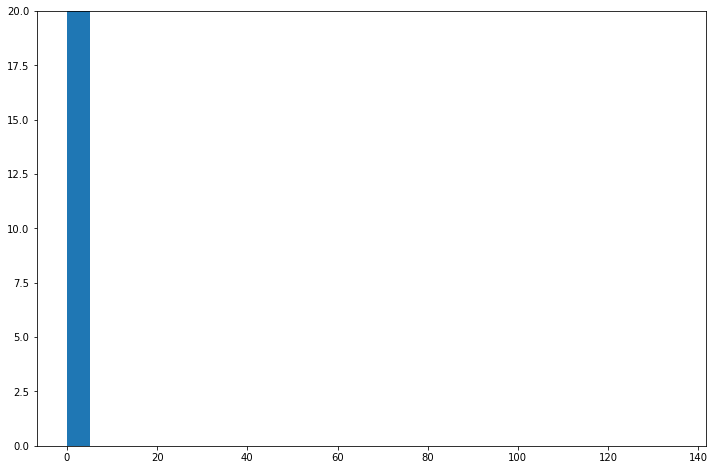

In [36]:
mu.figure()
fig2=fig[250:400,450:650]
#plt.imshow(fig2)
#mu.figure()
a=fig2.flatten()
bins=np.arange(0,140,5)
plt.hist(a,bins)
plt.ylim(0,20)

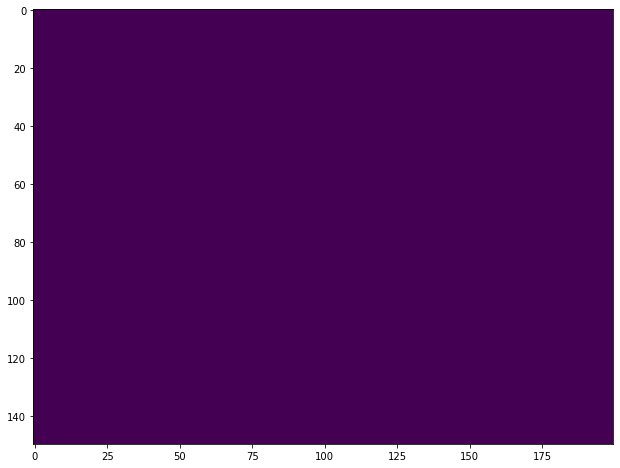

In [29]:
fig2[fig2<40]=0
mu.figure()
plt.imshow(fig2)

In [30]:
key="bunchPatternNode.bunchPatternPeriod.value"
key="channel_0.pulsePeriod.value"
a=run.get_array(source,key)
plt.plot(a)

NameError: name 'source' is not defined

In [31]:
#b=run.get_array("HED_IA1_DETM/MOTOR/LC_AXIS_4","actualPosition.value")
b=run["HED_IA1_DETM/MOTOR/LC_AXIS_4"]

SourceNameError: This data has no source named 'HED_IA1_DETM/MOTOR/LC_AXIS_4'.
See data.all_sources for available sources.

In [32]:
plt.plot(b.values)

NameError: name 'b' is not defined

In [33]:
run.info()

# of trains:    5181
Duration:       0:08:38.1
First train ID: 1300071098
Last train ID:  1300076278

0 detector modules ()

48 instrument sources (excluding detectors):
  - HED_EXP_IC1/ADC/1:channel_0.output
  - HED_EXP_IC1/ADC/1:channel_1.output
  - HED_EXP_IC1/ADC/1:channel_2.output
  - HED_EXP_IC1/ADC/1:channel_3.output
  - HED_EXP_IC1/ADC/1:channel_4.output
  - HED_EXP_IC1/ADC/1:channel_5.output
  - HED_EXP_IC1/ADC/1:channel_6.output
  - HED_EXP_IC1/ADC/1:channel_7.output
  - HED_EXP_IC1/ADC/1:channel_8.output
  - HED_EXP_IC1/ADC/1:channel_9.output
  - HED_EXP_ZYLA/CAM/5:daqOutput
  - HED_IA1_EPX100-1/DET/RECEIVER:daqOutput
  - HED_IA1_JF500K1/DET/JNGFR01:daqOutput
  - HED_IA1_JF500K2/DET/JNGFR02:daqOutput
  - HED_IA1_TSC-1/CAM/TARGET_FRONT:daqOutput
  - HED_IA1_TSC-2/CAM/TARGET_BACK:daqOutput
  - HED_IA2_DETB/ADC/1:channel_0.output
  - HED_IA2_DETB/ADC/1:channel_1.output
  - HED_IA2_DETB/ADC/1:channel_2.output
  - HED_IA2_DETB/ADC/1:channel_3.output
  - HED_IA2_DETB/ADC/1:channel